In [277]:
from datetime import datetime
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [278]:
path_to_csv = '../Data/Image_Vectors/'

### set up lists that represent bins for the time period to seperate works into

In [279]:
batch1 = []    # upto_1962
batch2 = []    # a1963_a1967
batch3 = []    # a1972_a1984
batch4 = []    # a1985_a1992
batch5 = []    # a1993_a2004

In [280]:
cat_master = pd.read_csv('../Data/master.csv')
cat_master.head()

,a_id,ids,link,title,no_pieces,circa,year_made,"medium (alpha, )",support,height (cm),...,no_ex,no_exspaces,no_semsoloex,no_pub,red,green,blue,hue,saturation,light
0,a1947_003,1947.003,https://www.artifexpress.com/catalogues/agnes-...,Self Portrait,1,1,1947,encaustic,canvas,66.0,...,2,2,1,0,96,83,58,39,0.25,0.3
1,a1947_006,1947.006,https://www.artifexpress.com/catalogues/agnes-...,Portrait of Daphne Vaughn,1,1,1947,encaustic,canvas,50.8,...,2,4,0,4,122,65,36,20,0.54,0.31
2,a1947_001,1947.001,https://www.artifexpress.com/catalogues/agnes-...,Nude,1,0,1947,oil,canvas,50.8,...,3,6,0,4,125,122,73,57,0.26,0.39
3,a1948_001,1948.001,https://www.artifexpress.com/catalogues/agnes-...,Untitled,1,1,1948,encaustic,canvas,45.7,...,2,4,0,2,87,65,64,3,0.15,0.3
4,a1949_001,1949.001,https://www.artifexpress.com/catalogues/agnes-...,Untitled,1,1,1949,oil,masonite,25.6,...,2,4,0,6,91,48,38,11,0.41,0.25


In [281]:
art_ids = cat_master['a_id'].tolist()
len(art_ids), cat_master.shape[0]

(638, 638)

In [282]:
# loop through ids, drop '.xxx' and 'a' to get year
# check to see which bin the work belongs to, append
# art_id to year bin list
for art_id in art_ids:
    
    # ID in aYYYY.000 format, split on '.', remove 'a'
    a_year = str(art_id).split('_')[0]
    
    # make sure year is type int
    year = int(a_year[1:])
    
    if year <= 1962:
        batch1.append(art_id)
        
    if (year >= 1963) and (year <= 1967) :
        batch2.append(art_id)
        
    if (year >= 1972) and (year <= 1984) :
        batch3.append(art_id)
        
    if (year >= 1985) and (year <= 1992) :
        batch4.append(art_id)
        
    if (year >= 1993):
        batch5.append(art_id)
        
print(f'Batch 1 upto   1962: {len(batch1)}')
print(f'Batch 2 1963 - 1967: {len(batch2)}')
print(f'Batch 3 1972 - 1984: {len(batch3)}')
print(f'Batch 4 1985 - 1992: {len(batch4)}')
print(f'Batch 5 1993 - 2004: {len(batch5)}')

Batch 1 upto   1962: 140
Batch 2 1963 - 1967: 63
Batch 3 1972 - 1984: 110
Batch 4 1985 - 1992: 100
Batch 5 1993 - 2004: 225


In [283]:
assert cat_master.shape[0] == (len(batch1) + len(batch2) + len(batch3) + len(batch4) + len(batch5))

### Load shape, texture, and color image vectors

In [284]:
shape_df = pd.read_csv(path_to_csv+'shape_image_features_adaptive.csv', header=None)
cols = shape_df.columns.tolist()
cols[0] = 'aid'
shape_df.columns = cols
shape_df.iloc[:,1:] = shape_df.iloc[:,1:].apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
shape_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a1947_001,0.972412,0.812601,0.980180,0.965428,0.972303,0.793399,0.970079,0.526313,0.981297,...,0.956099,0.974975,0.978599,0.941670,0.956966,0.863067,0.922854,0.662027,0.951104,0.404297
1,a1947_003,0.951434,0.320870,0.947836,0.962148,0.939621,0.683767,0.969293,0.727508,0.956807,...,0.921716,0.954644,0.978633,0.960906,0.964414,0.418058,0.919650,0.634213,0.927067,0.526530
2,a1947_006,0.912273,0.754856,0.913630,0.933997,0.939957,0.759414,0.973079,0.390393,0.912879,...,0.947811,0.955948,0.917404,0.875367,0.940390,0.834138,0.952041,0.605385,0.957663,0.610499
3,a1948_001,0.965648,0.654830,0.976462,0.986617,0.977007,0.915785,0.933149,0.640488,0.969312,...,0.934443,0.936032,0.945981,0.959244,0.936593,0.555961,0.929912,0.649167,0.947238,0.725394
4,a1949_001,0.978921,0.743829,0.955327,0.971991,0.973731,0.761723,0.958054,0.524270,0.979029,...,0.940429,0.968025,0.969008,0.962076,0.945620,0.788885,0.944995,0.622236,0.948133,0.408922


In [285]:
texture_df = pd.read_csv(path_to_csv+'texture_description_vectors.csv', header=None)
cols = texture_df.columns.tolist()
cols[0] = 'aid'
texture_df.columns = cols
texture_df.iloc[:,1:] = texture_df.iloc[:,1:].apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
texture_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,a1947_001,0.514150,0.265934,0.347275,0.638637,0.089011,1.000000,0.688058,0.276582,0.305175,...,0.135159,0.104632,0.230015,0.341014,0.543236,0.039550,0.371732,0.250054,0.190707,0.098112
1,a1947_003,0.370983,0.137104,0.118804,0.182523,0.019188,0.334313,0.354051,0.220250,0.364697,...,0.154438,0.872277,0.244252,0.197801,0.246631,0.032644,0.188135,0.216852,0.195422,0.401437
2,a1947_006,0.659011,0.379720,0.297674,0.434500,0.051944,0.779842,0.835253,0.515074,0.526464,...,0.142707,0.187639,0.482553,0.419690,0.418904,0.029940,0.314991,0.242675,0.261885,0.167890
3,a1948_001,0.396159,0.141852,0.168544,0.190031,0.022982,0.518065,0.707133,0.337079,0.327903,...,0.097683,0.099595,0.214734,0.205638,0.179756,0.011128,0.168466,0.151750,0.154219,0.091464
4,a1949_001,0.037382,0.055482,0.063927,0.050397,0.136572,0.054895,0.083589,0.050876,0.023491,...,0.047821,0.283749,0.050173,0.072689,0.063375,0.027595,0.078382,0.065020,0.043969,0.216211


In [716]:
color_df = pd.read_csv(path_to_csv+'color_40_40_5_features.csv', header=None)
cols = color_df.columns.tolist()
cols[0] = 'aid'
color_df.columns = cols
color_df.iloc[:,1:] = color_df.iloc[:,1:].apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
color_df.fillna(0, inplace=True)
color_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,a1947_001,0.005388,0.008736,0.003445,0.000229,0.117948,0.012689,0.067648,0.038079,0.000387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a1947_003,0.000319,0.000321,0.000000,0.000000,0.031359,0.000845,0.004291,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a1947_006,0.000000,0.000000,0.000000,0.000000,0.023304,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a1948_001,0.007675,0.004213,0.000000,0.000000,0.068607,0.005547,0.005632,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a1949_001,0.001712,0.000000,0.000000,0.000000,0.017062,0.006804,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [717]:
color_df.shape, texture_df.shape, shape_df.shape

((637, 40001), (637, 3601), (637, 25))

### stange mismatch of images and image vectors, will need to look into later but for now remove them from the batch

In [1]:
"""
a1958_016               --> missing from batch 1
_________               --> missing from batch 2
a1980_020               --> missing from batch 3
a1985_027, a1988_006    --> missing from batch 4
a1999_001, a1999_004    --> missing from batch 5
"""

In [288]:
batch1.remove('a1958_016')
batch3.remove('a1979_001')
batch3.remove('a1980_020')
batch4.remove('a1985_027')
batch4.remove('a1988_006')
batch5.remove('a1999_001')
batch5.remove('a1999_004')

### set up batchs for shape, texture, and color

In [289]:
# set up shape batch's
# batch 1
shape_batch1 = shape_df[shape_df['aid'].isin(batch1)]
shape_batch1 = shape_batch1.reset_index(drop=True)

# batch 2
shape_batch2 = shape_df[shape_df['aid'].isin(batch2)]
shape_batch2 = shape_batch2.reset_index(drop=True)

# batch 3
shape_batch3 = shape_df[shape_df['aid'].isin(batch3)]
shape_batch3 = shape_batch3.reset_index(drop=True)

# batch 4
shape_batch4 = shape_df[shape_df['aid'].isin(batch4)]
shape_batch4 = shape_batch4.reset_index(drop=True)

# batch 5
shape_batch5 = shape_df[shape_df['aid'].isin(batch5)]
shape_batch5 = shape_batch5.reset_index(drop=True)

# check to make sure len is correct for each batch
shape_batch1.shape, shape_batch2.shape, shape_batch3.shape, shape_batch4.shape, shape_batch5.shape

((137, 25), (62, 25), (107, 25), (98, 25), (221, 25))

In [290]:
# set up texture batch's
# batch 1
texture_batch1 = texture_df[texture_df['aid'].isin(batch1)]
texture_batch1 = texture_batch1.reset_index(drop=True)

# batch 2
texture_batch2 = texture_df[texture_df['aid'].isin(batch2)]
texture_batch2 = texture_batch2.reset_index(drop=True)

# batch 3
texture_batch3 = texture_df[texture_df['aid'].isin(batch3)]
texture_batch3 = texture_batch3.reset_index(drop=True)

# batch 4
texture_batch4 = texture_df[texture_df['aid'].isin(batch4)]
texture_batch4 = texture_batch4.reset_index(drop=True)

# batch 5
texture_batch5 = texture_df[texture_df['aid'].isin(batch5)]
texture_batch5 = texture_batch5.reset_index(drop=True)

# check to make sure len is correct for each batch
texture_batch1.shape, texture_batch2.shape, texture_batch3.shape, texture_batch4.shape, texture_batch5.shape

((137, 3601), (62, 3601), (107, 3601), (98, 3601), (221, 3601))

In [291]:
# set up color batch's
# batch 1
color_batch1 = color_df[color_df['aid'].isin(batch1)]
color_batch1 = color_batch1.reset_index(drop=True)

# batch2
color_batch2 = color_df[color_df['aid'].isin(batch2)]
color_batch2 = color_batch2.reset_index(drop=True)

# batch 3
color_batch3 = color_df[color_df['aid'].isin(batch3)]
color_batch3 = color_batch3.reset_index(drop=True)

# batch 4
color_batch4 = color_df[color_df['aid'].isin(batch4)]
color_batch4 = color_batch4.reset_index(drop=True)

# batch 5
color_batch5 = color_df[color_df['aid'].isin(batch5)]
color_batch5 = color_batch5.reset_index(drop=True)

# check to make sure len is correct for each batch
color_batch1.shape, color_batch2.shape, color_batch3.shape, color_batch4.shape, color_batch5.shape

((137, 641), (62, 641), (107, 641), (98, 641), (221, 641))

### functions for similarity scores

In [292]:
def chi2_distance(histA, histB, eps = 1e-10):
        # compute the chi-squared distance
        dist = 0.5 * np.sum( [ ((a - b) ** 2) / (a + b + eps) 
                              for (a, b) in zip(histA, histB) ] )
        
        # return the chi-squared distance
        return dist

In [293]:
def minkowski_distance(histA, histB, p = 1.5):
    return sum(abs(e1-e2)**p for e1, e2 in zip(histA, histB))**(1/p)

### get comps
1. set query id and query feature vector
2. set search ids and search feature vectors
3. calculate the distance between the vectors
4. store the results, sort them and return the selected amount
5. results are returned as a list with the query id and tuples of distance to query id and serach id

In [479]:
def get_comps(img_descriptor, limit, metric='minkowski', p=1.5):
    # initialize list to hold results
    comps = []

    # set the number of comps we want to return
    limit = limit

    # loop over the batch
    for i in range(len(img_descriptor)):

        # set the query id and query feature vector
        aid = img_descriptor['aid'].at[i]
        query = img_descriptor.iloc[i, 1:].tolist()

        # initialize the dictionary used to hold results
        results = {}

        # loop over the batch calculating the distance from each image to the query
        for j in range(len(img_descriptor)):
            # set search vector that is being comparied to query features
            features = img_descriptor.iloc[j, 1:].tolist()

            # calculate distance
            if metric == 'minkowski':
                dist = minkowski_distance(query, features, p=p)
            elif metric == 'chi2':
                dist = chi2_distance(query, features)
            else:
                print("please provid a valid metric, 'minkowski' or 'chi2'")

            # save id as dictionary key and the distance to query as the value
            results[img_descriptor['aid'].at[j]] = dist

        # sort the results smallest to largest and save in a list
        results = sorted( [(v, k) for (k, v) in results.items()] )

        # set the first element in list to the query id
        results[0] = aid

        # limit results to the number provided
        results = results[:limit]

        # append the results to our comps list that will hold all results for the batch
        comps.append(results)

    return comps

In [777]:
comps1 = get_comps(texture_batch5, limit=35, metric='minkowski', p=0.5)

### get layer 2 comps using the results from layer 1

In [778]:
# turn the list of individual comps based on layer 1 into a dataframe
full_comps = []

for i in range(len(comps1)):
    aid = comps1[i][0]
    temp = []
    for j in range(1,35):
        comp = comps1[i][j][1]
        temp.append(comp)
    all_sim = [aid] + temp
    full_comps.append(all_sim)
    

cols = ['aid']+[x for x in range(1, 35)]
layer1_comps = pd.DataFrame(full_comps, columns=cols)
layer1_comps.head()

,aid,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,a1993_001,a2000_005,a1996_009,a2001_018,a1997_001,a1996_016,a1994_018,a1999_036,a1996_002,a1994_019,...,a1999_032,a1996_004,a1999_033,a2002_008,a2002_015,a1994_008,a1997_022,a1997_017,a1994_009,a1995_019
1,a1993_002,a2003_017,a2002_006,a2001_019,a1994_010,a2001_011,a2000_005,a1993_001,a1995_001,a1999_027,...,a1996_010,a1997_017,a1999_033,a1995_019,a2000_007,a2001_008,a1994_015,a1994_019,a1994_018,a1994_014
2,a1993_003,a1994_011,a1996_005,a1994_007,a1994_012,a1994_015,a2001_013,a1995_012,a1995_014,a1995_009,...,a2000_008,a1996_008,a2000_002,a1996_003,a2001_010,a1994_003,a1995_013,a1998_014,a1993_002,a1997_002
3,a1994_001,a2004_006,a2003_012,a1999_046,a2003_016,a2002_024,a1999_045,a2001_005,a2001_002,a2003_013,...,a2000_013,a2004_003,a1999_042,a2003_004,a2001_034,a2002_001,a1996_023,a2001_004,a1999_037,a2004_001
4,a1994_002,a1995_011,a1995_015,a1998_002,a1995_009,a1995_013,a1998_013,a1998_012,a1995_016,a2002_010,...,a1996_003,a2003_007,a1995_014,a1994_011,a2004_005,a1994_004,a1998_015,a1999_007,a1995_018,a2001_014


### use dataframe from above to create new query and feature vectors for layer 2

In [482]:
def get_layer_comps(img_descriptor, layer_descriptor, limit=15, metric='minkowski', p=1.5):
    comps = []

    for i in range(len(img_descriptor)):
        # query => aid and texture vector
        query_id = img_descriptor['aid'].loc[i]
        query_features = layer_descriptor.iloc[:,1:][layer_descriptor['aid'] == query_id].values.tolist()[0]

        # ids of comps that will need to be turned into features
        feature_ids = img_descriptor.iloc[:,1:][img_descriptor['aid'] == query_id].values.tolist()[0]

        #
        results = {}

        #
        for j in range(len(feature_ids)):
            feature_id = feature_ids[j]
            features = layer_descriptor.iloc[:,1:][layer_descriptor['aid'] == feature_id].values.tolist()[0]

            # calculate distance
            if metric == 'minkowski':
                dist = minkowski_distance(query_features, features, p=p)
            elif metric == 'chi2':
                dist = chi2_distance(query_features, features)
            else:
                print("please provid a valid metric, 'minkowski' or 'chi2'")


            results[feature_id] = dist

        # sort the results smallest to largest
        results = sorted( [(v, k) for (k, v) in results.items()] )

        #
        results[0] = query_id
        results = results[:limit]
        comps.append(results)
        
    return comps


In [779]:
comps2 = get_layer_comps(layer1_comps, shape_batch5, limit=15)

In [780]:
# turn the list of individual comps based on layer 1 into a dataframe
full_comps = []

for i in range(len(comps2)):
    aid = comps2[i][0]
    temp = []
    for j in range(1,15):
        comp = comps2[i][j][1]
        temp.append(comp)
    all_sim = [aid] + temp
    full_comps.append(all_sim)
    

cols = ['aid']+[x for x in range(1, 15)]
layer2_comps = pd.DataFrame(full_comps, columns=cols)
layer2_comps.head()

,aid,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,a1993_001,a1997_015,a1997_019,a1999_033,a1994_008,a1996_016,a1994_010,a1994_009,a1999_034,a1999_031,a1999_022,a2002_008,a1999_025,a1995_019,a1997_022
1,a1993_002,a2002_015,a1995_019,a1996_001,a1997_006,a1999_024,a1997_017,a2001_018,a2001_008,a1999_032,a1994_010,a1999_033,a1996_002,a1997_016,a1994_008
2,a1993_003,a1994_012,a1995_012,a1995_019,a2000_002,a2000_008,a1993_002,a1996_008,a1995_005,a1994_011,a2001_013,a1994_019,a1998_007,a1995_018,a1995_008
3,a1994_001,a2003_012,a1996_021,a1999_045,a1999_042,a2000_013,a1999_003,a2001_007,a2001_001,a2001_005,a2001_034,a1999_046,a2002_001,a2002_021,a1999_037
4,a1994_002,a1994_003,a1994_004,a1994_007,a1996_003,a1998_013,a1995_017,a1994_011,a2001_014,a1995_016,a2003_007,a1995_011,a2001_021,a1998_015,a1998_002


### Get layer 3 comps and save output

In [781]:
comps3 = get_layer_comps(layer2_comps, color_batch5, metric='minkowski', p=1.5)

In [790]:
comps3[111]

['a1999_025',
 (1.2351338507541705, 'a1996_002'),
 (1.3498449844791298, 'a1997_006'),
 (1.3736012869782135, 'a1996_016'),
 (1.5257612617409841, 'a1997_019'),
 (1.5264778599685034, 'a1993_001'),
 (1.6072713680701753, 'a1997_015'),
 (1.675233564043888, 'a2002_008'),
 (1.6842601340207182, 'a1999_034'),
 (1.706814812909774, 'a1994_018'),
 (1.7700168449497562, 'a1999_022'),
 (1.8022662032366303, 'a1994_010'),
 (1.935062637199064, 'a1995_019'),
 (2.678973272923384, 'a1994_019')]

In [791]:
img_comps = [comps3[111][i] for i in range(len(comps3[111]))]

temp = []
for elm in img_comps[1:]:
    work = elm[1].replace('a','').replace('_','.')
    temp.append(work)
    
temp

['1996.002',
 '1997.006',
 '1996.016',
 '1997.019',
 '1993.001',
 '1997.015',
 '2002.008',
 '1999.034',
 '1994.018',
 '1999.022',
 '1994.010',
 '1995.019',
 '1994.019']

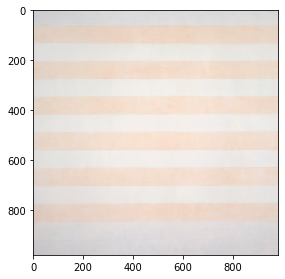

In [792]:
img = Image.open('../Data/Paintings/1999.025.png')
plt.figure(figsize=(4.5, 4.5))
plt.imshow(img);

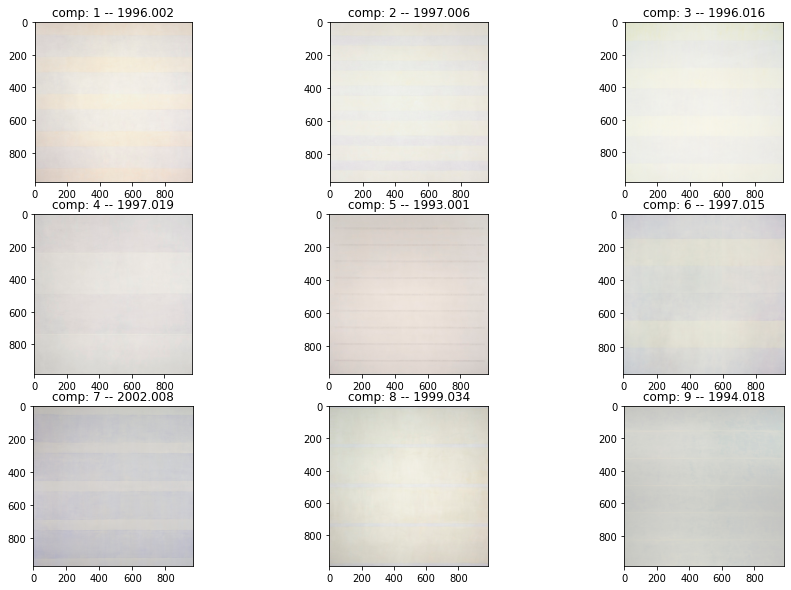

In [793]:
plt.figure(figsize=(15,10)) # specifying the overall grid size
for i in range(1, 10):
    plt.subplot(3,3,i)    # the number of images in the grid is 3*3 (9)
    img = Image.open('../Data/Paintings/' + temp[i-1] + '.png')
    plt.title(f"comp: {i} -- {temp[i-1]}")
    plt.imshow(img)
plt.show()

### save batch as csv

In [794]:
full_comps = []

for i in range(len(comps3)):
    aid = comps3[i][0]
    temp = []
    for j in range(1,6):
        comp = comps3[i][j][1]
        temp.append(comp)
    all_sim = [aid] + temp
    full_comps.append(all_sim)
    

In [795]:
df = pd.DataFrame(full_comps, columns=['aid', '1', '2', '3', '4', '5'])
df.head()

,aid,1,2,3,4,5
0,a1993_001,a2002_008,a1994_010,a1999_033,a1997_022,a1999_025
1,a1993_002,a1997_017,a2001_018,a1994_008,a1997_006,a1996_002
2,a1993_003,a1993_002,a2000_002,a1995_008,a1995_012,a1994_011
3,a1994_001,a2000_013,a2001_034,a1999_046,a1999_042,a1999_045
4,a1994_002,a1998_015,a2003_007,a1996_003,a2001_021,a1994_004


In [796]:
df.to_csv('batch5.csv', index=False)